In [59]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import keras
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
import random
import pickle
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [2]:
df  = pd.read_csv('cleaneddataset.csv')

In [3]:
df

,SiteName,Depth(m),Diver,ImageNumber,ImageAnalyzedNumber,"PhotoAnalyzed(0,1)",ReasonOmitted,ImageWidth(cm),ImageLength(cm),AreaPerPoint(cm^2),...,MixedChondrusTurfCorallina,JuvenileSaccharinaLatissima,MixedChondrusCoralina,MixedTurfCorallina,TotalPts,Kelp,algae1,algae2,rock,unknown
0,Nowlans Shoal,6,AB,8,1.0,1,NaN,178.84,100.53,200.0,...,NaN,NaN,NaN,NaN,91,26,24,41,0,0
1,Nowlans Shoal,6,AB,11,2.0,1,NaN,179.00,100.62,200.0,...,15.0,NaN,NaN,NaN,91,17,44,30,0,0
2,Nowlans Shoal,6,AB,14,3.0,1,NaN,172.65,97.05,175.0,...,NaN,NaN,NaN,NaN,91,10,35,46,0,0
3,Nowlans Shoal,6,AB,17,4.0,1,NaN,166.20,93.42,175.0,...,NaN,NaN,NaN,NaN,91,22,37,32,0,0
4,Nowlans Shoal,6,AB,20,5.0,1,NaN,184.24,103.57,200.0,...,0.0,0.0,0.0,2.0,91,13,26,52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,Goose I,9,KA,27,NaN,1,NaN,196.23,110.31,225.0,...,3.0,NaN,NaN,NaN,91,85,3,0,0,3
1065,Goose I,9,KA,35,NaN,1,NaN,180.55,101.49,195.0,...,NaN,NaN,NaN,NaN,91,89,2,0,0,0
1066,Goose I,9,KA,41,NaN,1,NaN,193.99,109.05,220.0,...,1.0,NaN,NaN,NaN,91,89,1,0,0,1
1067,Goose I,9,KA,47,NaN,1,NaN,196.61,110.52,220.0,...,NaN,NaN,NaN,NaN,91,91,0,0,0,0


In [4]:
train_image = []
test_image = []
for i in tqdm(df.itertuples()):

    island = i.SiteName.replace(" ", "")
    # if(island=='TuffinI'):
    #     m_t = str(i[2]) + 'm'
    #     diver_t = m_t + '_' + i.Diver
    #     im_num_t = str(i.ImageNumber).zfill(3)
    #     im_name_t = island + str(i[2]) + i.Diver[0] + '_' + im_num_t
    #     img_t = image.load_img('EasternShoreIslandsKelpSurvey2018/' + island + "/" + diver_t + "/" + im_name_t +'.jpg', target_size=(500,500,3))
    #     img_t = image.img_to_array(img_t)
    #     img_t = img_t/255
    #     test_image.append(img_t)
    # else:
    m = str(i[2]) + 'm'
    diver = m + '_' + i.Diver
    im_num = str(i.ImageNumber).zfill(3)
    im_name = island + str(i[2]) + i.Diver[0] + '_' + im_num
    img = image.load_img('EasternShoreIslandsKelpSurvey2018/' + island + "/" + diver + "/" + im_name +'.jpg', target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)


X = np.array(train_image)
# X_test = np.array(test_image)

1069it [00:22, 47.60it/s]


In [5]:
print(X.shape)

(1069, 200, 200, 3)


In [6]:
X_test.shape

NameError: name 'X_test' is not defined

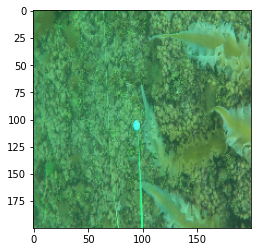

In [7]:
plt.imshow(X[3])

In [8]:
print(df.columns)

Index(['SiteName', 'Depth(m)', 'Diver', 'ImageNumber', 'ImageAnalyzedNumber',
       'PhotoAnalyzed(0,1)', 'ReasonOmitted', 'ImageWidth(cm)',
       'ImageLength(cm)', 'AreaPerPoint(cm^2)', 'Total', 'NullPoint',
       'SaccharinaLatissima', 'LaminariaDigitata', 'AgarumClathratum',
       'AlariaEsculenta', 'SacchorizaDermatodea', 'UnidentifiedKelp',
       'ZosteraMarina', 'CodiumFragile', 'Fucusspp', 'Turf', 'ChondusCrispus',
       'PalmariaPalmata', 'CorallineAlgae', 'Desmarestiaspp',
       'UnifentifiedAlgae', 'Bedrock', 'Boulder', 'Cobble', 'Pebble', 'Sand',
       'PlumbLine', 'Unknown', 'MembraniporaMembranacea', 'MixedChondrusTurf',
       'CorallinaOfficinalis', 'MixedChondrusTurfCorallina',
       'JuvenileSaccharinaLatissima', 'MixedChondrusCoralina',
       'MixedTurfCorallina', 'TotalPts', 'Kelp', 'algae1', 'algae2', 'rock',
       'unknown'],
      dtype='object')


In [28]:
y_train = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']]

In [29]:
y_train = y_train.fillna(0)

In [30]:
y_train.head(10)


,Kelp,algae1,algae2,rock,unknown
0,26,24,41,0,0
1,17,44,30,0,0
2,10,35,46,0,0
3,22,37,32,0,0
4,13,26,52,0,0
5,14,44,30,3,0
6,10,28,53,0,0
7,18,31,42,0,0
8,9,47,35,0,0
9,32,19,40,0,0


In [31]:
y_train = y_train.astype(bool).astype(int)

In [32]:
y_train

,Kelp,algae1,algae2,rock,unknown
0,1,1,1,0,0
1,1,1,1,0,0
2,1,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
1064,1,1,0,0,1
1065,1,1,0,0,0
1066,1,1,0,0,1
1067,1,0,0,0,0


In [33]:
y_train['Kelp'].value_counts()

1    1038
0      31
Name: Kelp, dtype: int64

In [34]:
# y_train = y_train.div(y_train.sum(axis=1), axis=0)
# y_test = y_test.div(y_test.sum(axis=1), axis=0)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.20, random_state=42, stratify=y_train)


In [36]:
ytrain = np.array(y_train)
yval = np.array(y_val)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=5, activation="sigmoid"))

In [61]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
early_stopping = EarlyStopping(patience=15, monitor='val_accuracy', min_delta=1e-3, verbose=1, mode='auto')
#reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [63]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 100, 100, 128)     147584    
                                                      

In [64]:
datagen_args = dict(
        brightness_range=[0.2,1.0],
        rotation_range=30,
        shear_range = 0.2,
        horizontal_flip=True,
        vertical_flip =True)

image_datagen = ImageDataGenerator(**datagen_args)

train_generator = image_datagen.flow(X_train, ytrain, batch_size=32, shuffle=True, seed=7)

#validation_generator = image_datagen.flow(X_val, yval, batch_size=32, shuffle=True, seed=7)

history = model.fit(
    train_generator,
    validation_data=(X_val, yval),
    epochs=50, callbacks=[early_stopping, checkpoint])

Epoch 1/50
27/27 [==============================] - ETA: 0s - loss: 0.4436 - accuracy: 0.9719
Epoch 1: val_accuracy improved from -inf to 0.96729, saving model to vgg16_1.h5
27/27 [==============================] - 249s 9s/step - loss: 0.4436 - accuracy: 0.9719 - val_loss: 0.4401 - val_accuracy: 0.9673
Epoch 2/50
27/27 [==============================] - ETA: 0s - loss: 0.4422 - accuracy: 0.9719
Epoch 2: val_accuracy did not improve from 0.96729
27/27 [==============================] - 248s 9s/step - loss: 0.4422 - accuracy: 0.9719 - val_loss: 0.4404 - val_accuracy: 0.9673
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 0.4418 - accuracy: 0.9719
Epoch 3: val_accuracy did not improve from 0.96729
27/27 [==============================] - 245s 9s/step - loss: 0.4418 - accuracy: 0.9719 - val_loss: 0.4403 - val_accuracy: 0.9673
Epoch 4/50
27/27 [==============================] - ETA: 0s - loss: 0.4435 - accuracy: 0.9719
Epoch 4: val_accuracy did not improve from 0.96729
2

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


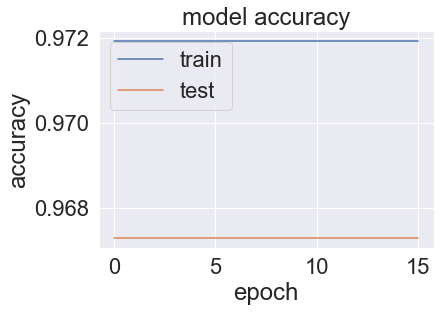

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

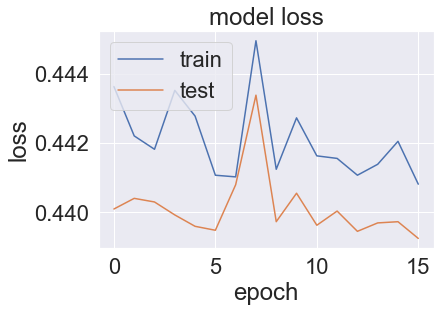

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
model = keras.models.load_model('vgg16_1.h5')

In [75]:
y_pred = model.predict(X_val)

In [69]:
precision = precision_score(yval, y_pred, average=None)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [77]:
imgtest = image.load_img('EasternShoreIslandsKelpSurvey2018/BirdI/6m_KA/BirdI6K_011.jpg', target_size=(200,200,3))
imgtest = image.img_to_array(imgtest)
imgtest = imgtest/255

[[0.970798   0.8852382  0.5236797  0.14041838 0.31512058]]
[0 1 2 4 3]
Kelp (0.971)
algae1 (0.885)
algae2 (0.524)
unknown (0.315)
rock (0.14)


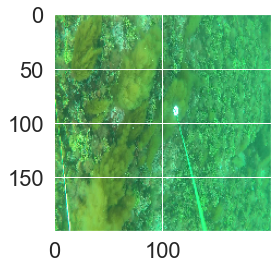

In [78]:
classes = np.array(y_val.columns)
proba = model.predict(imgtest.reshape(1,200,200,3))
print(proba)
top_3 = np.argsort(proba[0])[:-6:-1]
print(top_3)
for i in range(5):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(imgtest)